# Implementing the SGD Classifier on the Master Data

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import recall_score

In [2]:
low_memory=False

In [3]:
df = pd.read_csv('IRAhandle_master_data.csv',encoding="latin-1")

C:\Users\akash\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,16,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['language'].value_counts()

English                952915
Russian                149287
German                  51107
Italian                 13279
Ukrainian                9919
Uzbek                    2352
Arabic                   2210
Bulgarian                2178
Serbian                  2133
Spanish                  1701
French                   1505
Norwegian                1423
Macedonian               1228
Farsi (Persian)          1165
Romanian                  993
Dutch                     738
Swedish                   671
Japanese                  544
Estonian                  515
LANGUAGE UNDEFINED        455
Vietnamese                444
Finnish                   417
Albanian                  337
Icelandic                 330
Catalan                   300
Turkish                   278
Lithuanian                273
Polish                    250
Croatian                  236
Pushto                    213
Slovak                    189
Portuguese                174
Greek                     174
Somali    

In [5]:
df['region'].value_counts()

United States           845288
Unknown                 260239
United Arab Emirates     22262
Azerbaijan               20023
Italy                    10879
Iraq                      9520
Germany                   9489
Russian Federation        7590
Ukraine                   5029
Malaysia                  4932
Afghanistan               1040
United Kingdom            1018
Belarus                    989
Israel                     930
France                     120
Japan                       38
Samoa                       32
Egypt                       32
India                       22
Turkey                       9
Saudi Arabia                 7
Spain                        6
Hong Kong                    3
Serbia                       2
Austria                      1
Name: region, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201330 entries, 0 to 1201329
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1201330 non-null  int64  
 1   external_author_id  1201330 non-null  object 
 2   author              1201330 non-null  object 
 3   content             1201330 non-null  object 
 4   region              1199500 non-null  object 
 5   language            1201330 non-null  object 
 6   publish_date        1201330 non-null  object 
 7   harvested_date      1201330 non-null  object 
 8   following           1201330 non-null  int64  
 9   followers           1201330 non-null  int64  
 10  updates             1201330 non-null  int64  
 11  post_type           547006 non-null   object 
 12  account_type        1201330 non-null  object 
 13  retweet             1201330 non-null  int64  
 14  account_category    1201330 non-null  object 
 15  new_june_2018  

In [7]:
df.drop(columns = ['retweet','region','language','new_june_2018','alt_external_id','post_type','account_type','tweet_id','article_url','tco1_step1','tco2_step1','tco3_step1','Unnamed: 0','external_author_id','author','publish_date','harvested_date','following','followers','updates'],  inplace= True)

## Data Pre-Processing as requested

## I am unsure as to how exploring Language/Region Specific Models will help here as there is no balance between observations representing different languages or different regions. 

## One key point to highlight here is that the language column has 'Language Undefined' values and the region column has a significantly huge number of instances with 'Unknown'. So I am lacked by my knowledge on how to deal with such values and how the algorithm shall behave in case of such data. 


In [8]:
df['troll'] = np.where (df['account_category'] == 'RightTroll', 1, 0)


In [9]:
df['troll'] = np.where (df['account_category'] == 'LeftTroll', 1,df['troll'])

In [10]:
df.drop(columns = ['account_category'],  inplace= True)

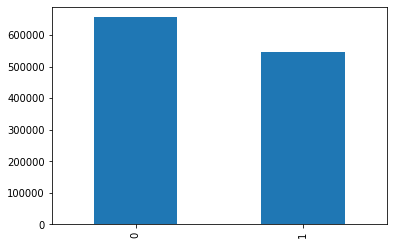

In [11]:
df['troll'].value_counts().plot(kind='bar')

In [12]:
vectorizer = TfidfVectorizer()
stemmer = PorterStemmer()
X = df['content']
y = df['troll']
stop_words = set(nltk.corpus.stopwords.words('english'))

In [13]:
def tokenize(text):
   tokens = [word for word in nltk.word_tokenize(text)] 
   tokens = map(str.lower, tokens)
   stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
   return stems

In [14]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))

In [15]:
sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),])

# Performing a Simple 75-25 Split of Data as the dataset is too large for K-Fold Cross Validation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
final_model = sgd.fit(X_train,y_train)
predictions = final_model.predict(X_test)

In [18]:
print('Accuracy',accuracy_score(y_test, predictions))
print('Kappa Score:',cohen_kappa_score(y_test, predictions))
print('Precision', precision_score(y_test, predictions))
print('Recall Score:', recall_score(y_test, predictions))

Accuracy 0.8575980661465773
Kappa Score: 0.7130337768606705
Precision 0.8393776746210198
Recall Score: 0.8487473230263737


# Final Metrics
# Accuracy 0.8575980661465773
# Kappa Score: 0.7130337768606705
# Precision 0.8393776746210198
# Recall Score: 0.8487473230263737